In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
import itertools
import matplotlib.pyplot as plt
from sklearn.preprocessing import *
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn import tree
from sklearn.model_selection import TimeSeriesSplit

In [22]:
import data_preprocessing

energy_consumption_data_train, energy_consumption_data_test = data_preprocessing.preprocess_data("Energy Consumption Dataset.csv")

In [23]:
X_TRAIN = energy_consumption_data_train[energy_consumption_data_train.columns[:-1]]
Y_TRAIN = energy_consumption_data_train["Energy Consumption"]

X_TEST = energy_consumption_data_test[energy_consumption_data_train.columns[:-1]]
Y_TEST = energy_consumption_data_test["Energy Consumption"]

In [26]:
regressor = RandomForestRegressor(random_state=42, n_jobs=-1)
    
regressor.fit(X_TRAIN, Y_TRAIN)

Y_PRED = regressor.predict(X_TEST)

print("Best Score (MSE):", (mean_squared_error(Y_TEST, Y_PRED)))
print("RMSE:", sqrt(mean_squared_error(Y_TEST, Y_PRED)))
print("R-squared:", r2_score(Y_TEST, Y_PRED))
print("MAE: ", mean_absolute_error(Y_TEST, Y_PRED))
print("MAPE: ", np.mean(np.abs((Y_TEST - Y_PRED) / Y_TEST)) * 100)

Best Score (MSE): 101170263.64377555
RMSE: 10058.342986982278
R-squared: 0.3939056457816661
MAE:  8116.165996147766
MAPE:  30.222495612705302


c:\Users\Babett\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
2860 fits failed out of a total of 5000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
638 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Babett\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Babett\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "c:\Users\Babett\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\Babett\anaconda3\Lib\site

Best Hyperparameters: {'oob_score': True, 'n_estimators': 300, 'min_weight_fraction_leaf': 0.0, 'min_samples_split': 2, 'min_samples_leaf': 4, 'min_impurity_decrease': 0.0, 'max_samples': 0.5, 'max_leaf_nodes': None, 'max_features': 'log2', 'max_depth': None, 'ccp_alpha': 0.1, 'bootstrap': True}
Best Score (MSE): 92718319.02230902
RMSE: 9629.035207242157
NRMSE: 0.14217634597115078
R-squared: 0.41667488591859514
MAE:  7949.904763707133
MAPE:  30.93987808739989


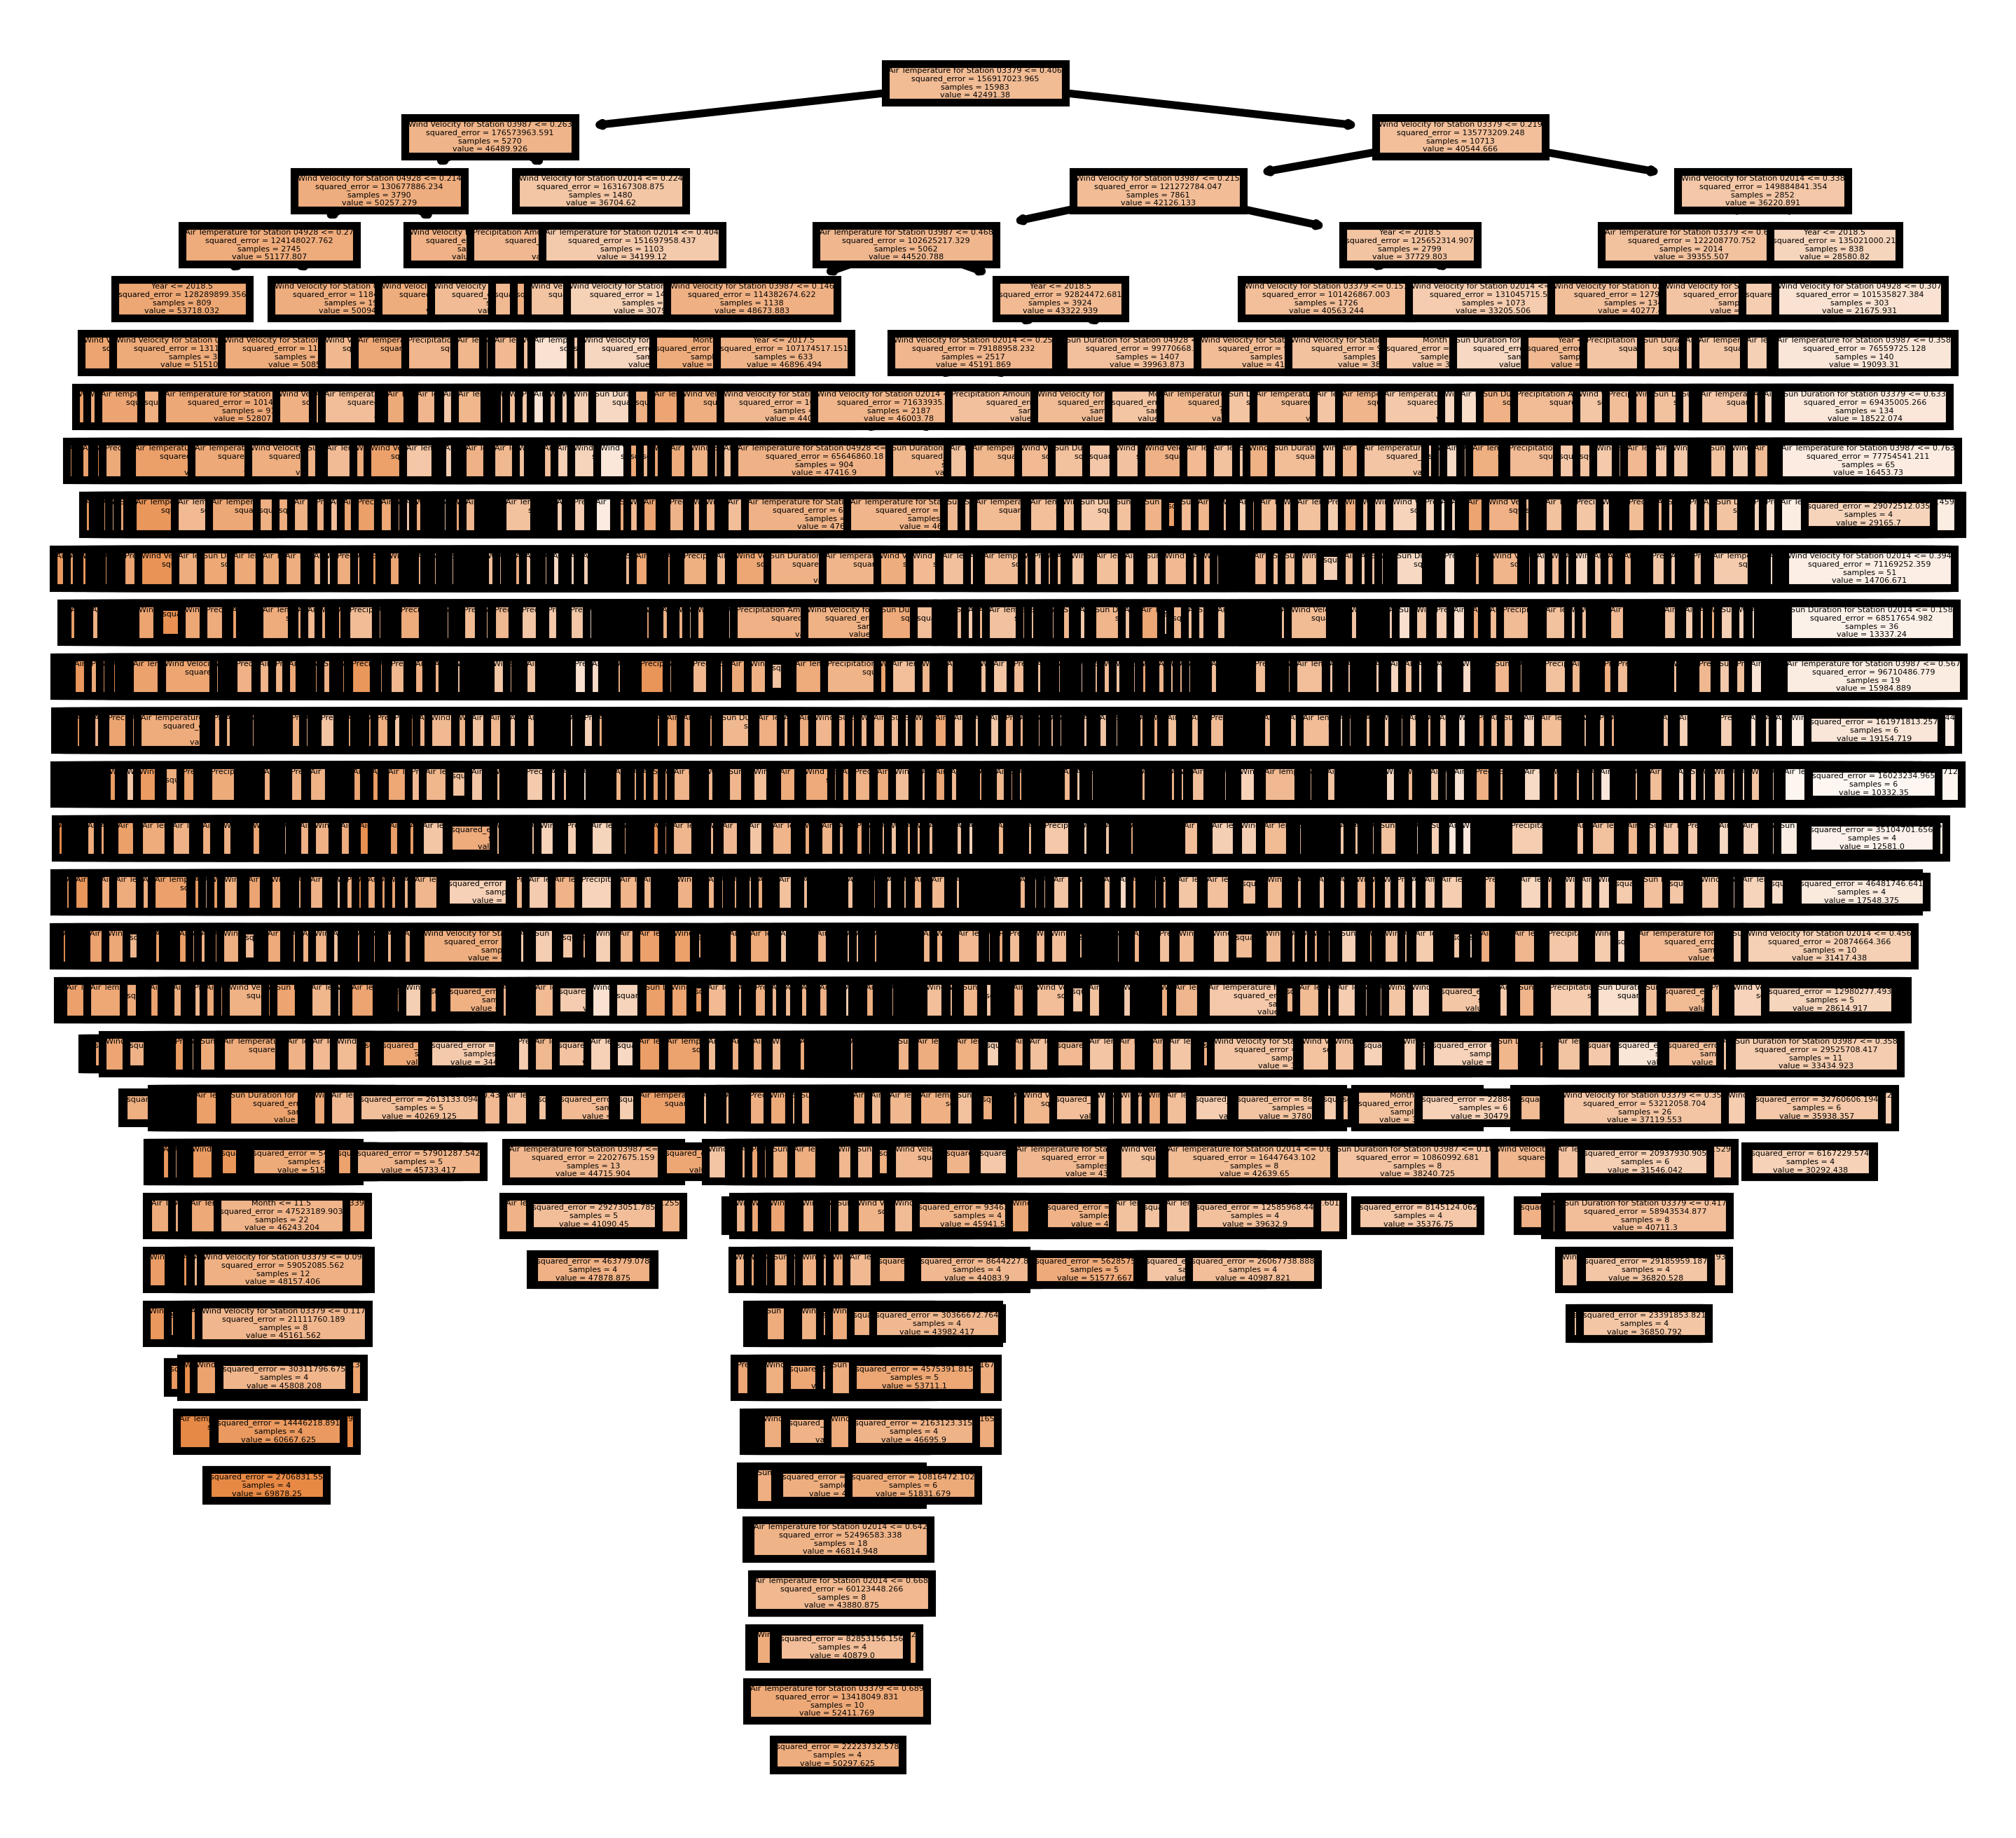

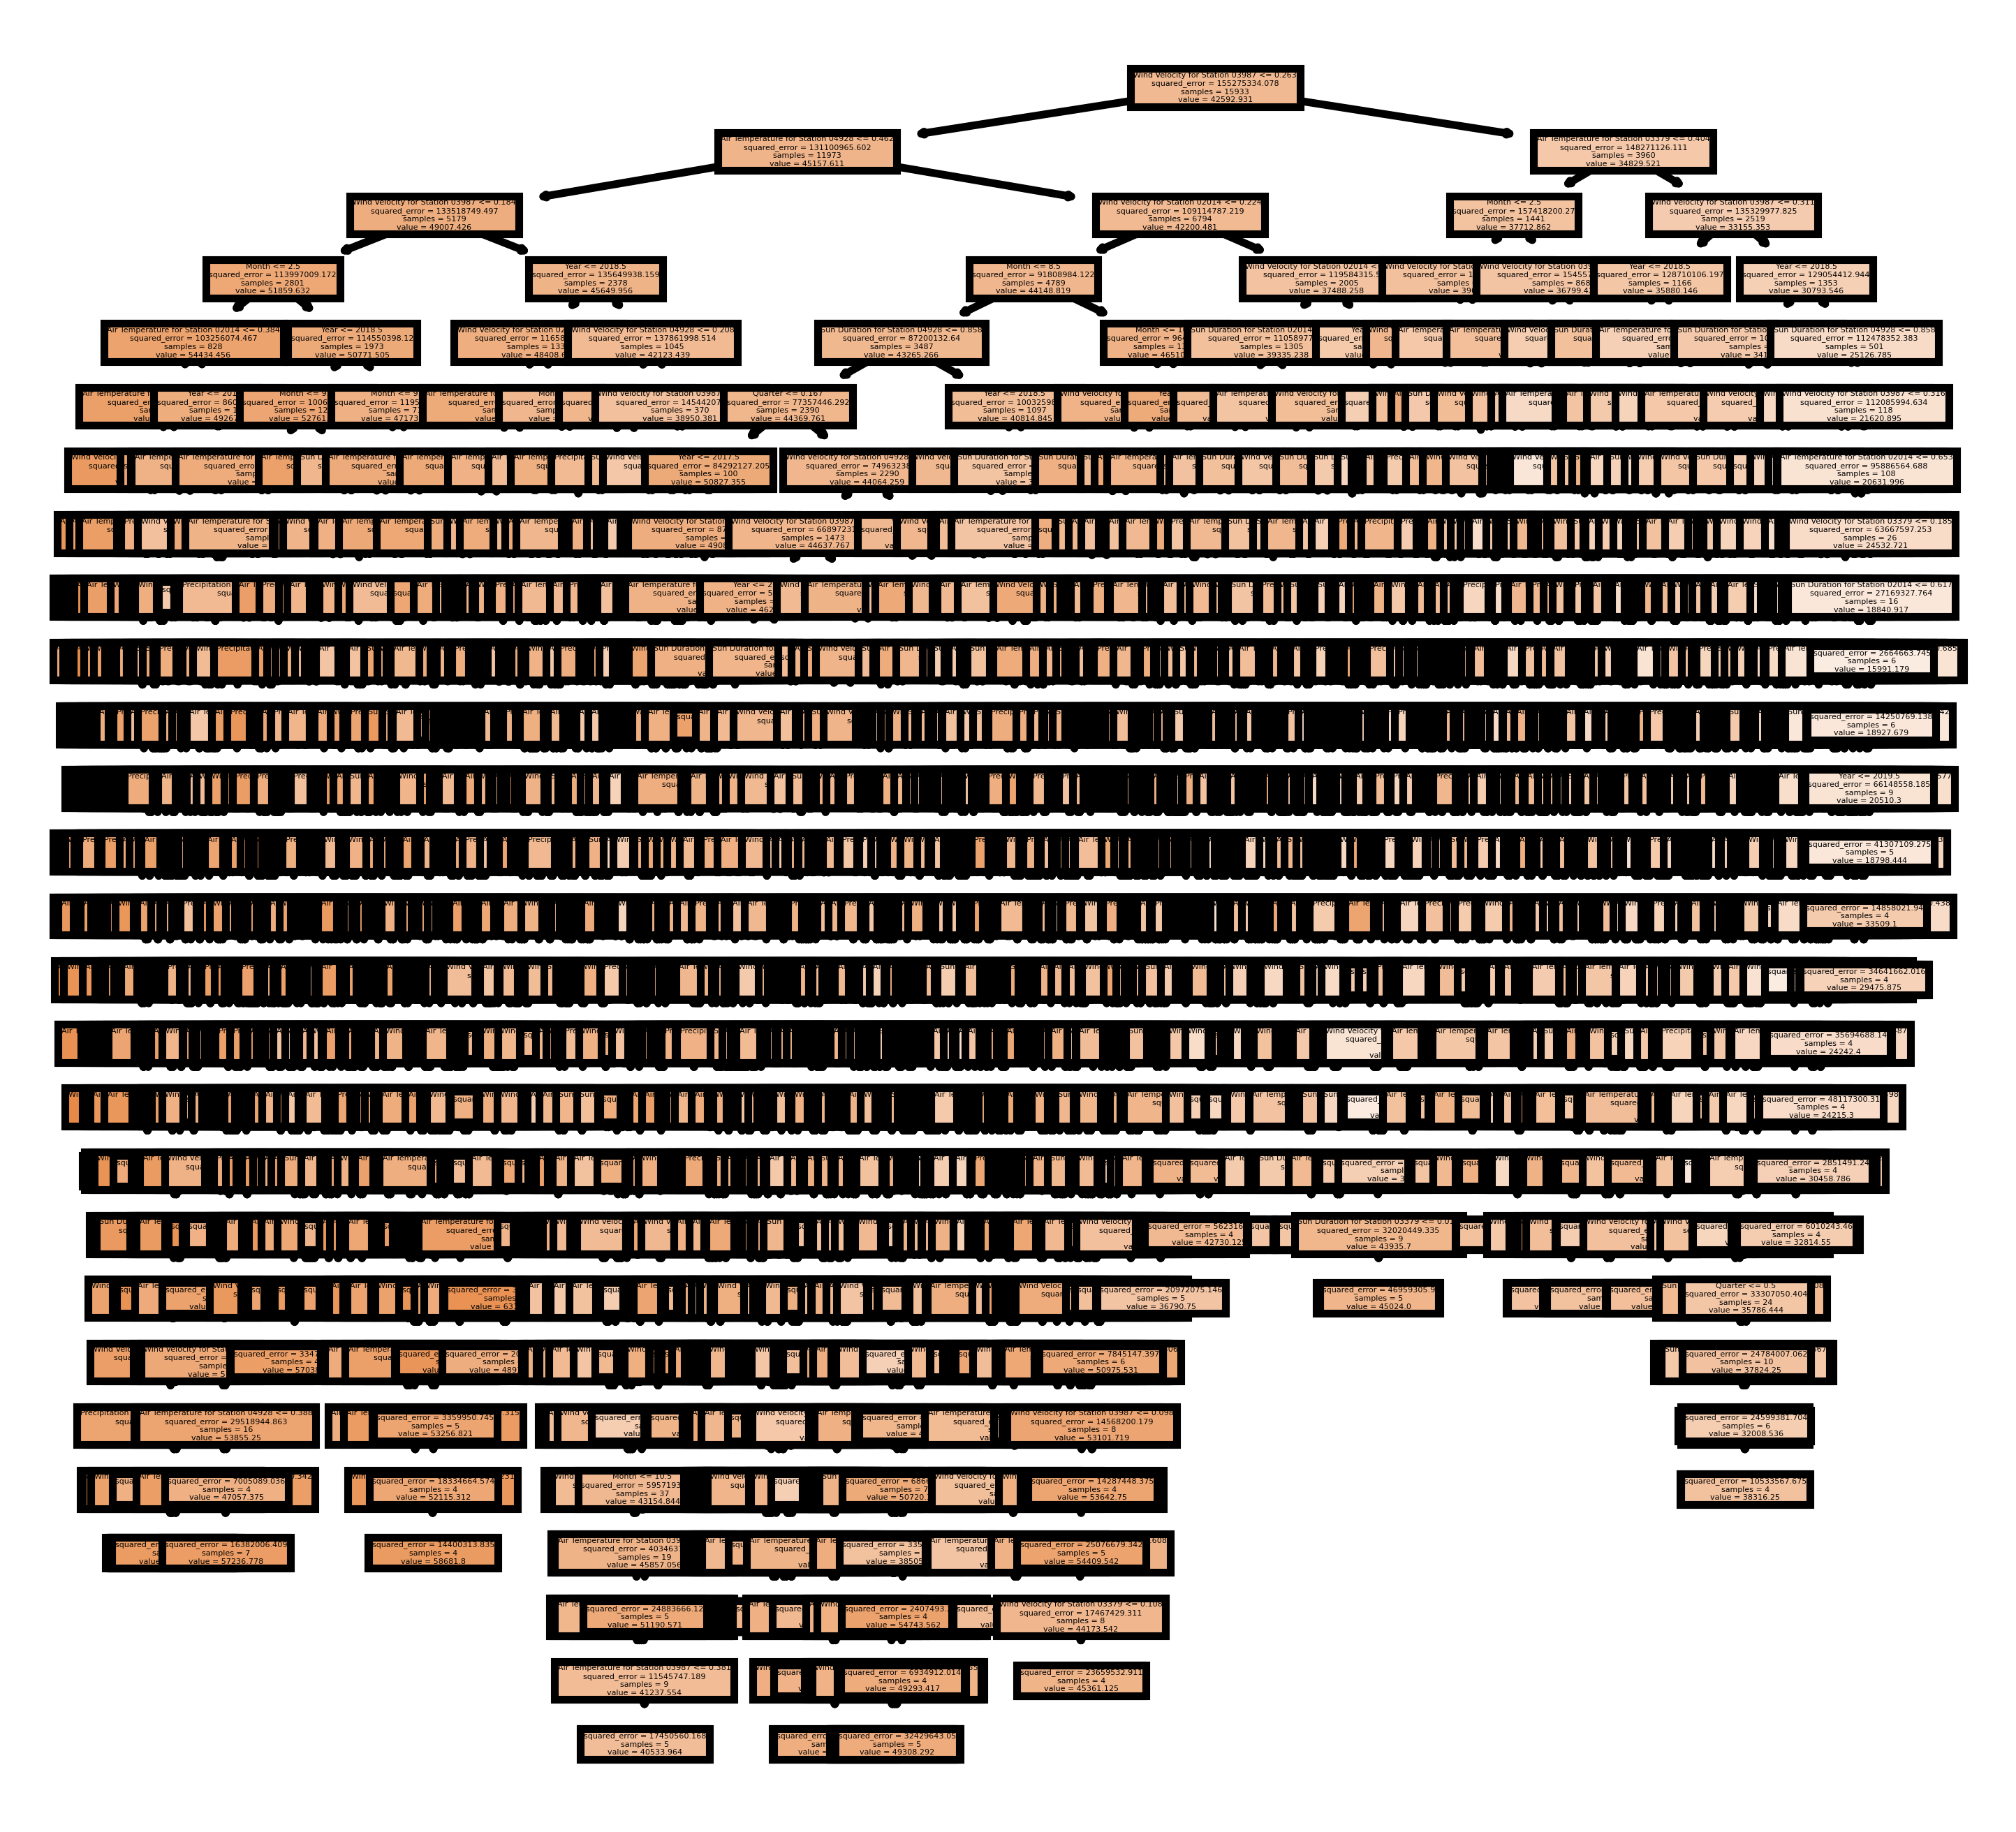

KeyboardInterrupt: 

In [29]:
# Define parameter grid
param_grid = {
    'n_estimators': [300],
    'max_depth': [None, 10, 50, 100],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2', None],
    'bootstrap': [True, False],
    'oob_score': [True, False],
    'max_samples': [None, 0.5, 0.8],
    'ccp_alpha': [0.0, 0.1, 0.5],
    'max_leaf_nodes': [None, 10, 50, 100],
    'min_impurity_decrease': [0.0, 0.1, 0.5],
    'min_weight_fraction_leaf': [0.0, 0.1, 0.5],
}

regressor = RandomForestRegressor(random_state=42, n_jobs=-1)

# Perform grid search
grid_search = RandomizedSearchCV(regressor, param_grid, cv=10, scoring='neg_mean_squared_error', n_iter=500, n_jobs=-1)
grid_search.fit(X_TRAIN, Y_TRAIN)

# Fit and predict using best estimator
best_regressor = grid_search.best_estimator_
best_regressor.fit(X_TRAIN, Y_TRAIN)
Y_PRED = best_regressor.predict(X_TEST)

# Print results
print(f"Best Hyperparameters:", grid_search.best_params_)
print(f"Best Score (MSE):", -grid_search.best_score_)
print(f"RMSE:", sqrt(-grid_search.best_score_))
print(f"NRMSE:", sqrt(-grid_search.best_score_) / (max(Y_TEST) - min(Y_TEST)))
print(f"R-squared:", r2_score(Y_TEST, Y_PRED))
print("MAE: ", mean_absolute_error(Y_TEST, Y_PRED))
print("MAPE: ", np.mean(np.abs((Y_TEST - Y_PRED) / Y_TEST)) * 100)

# Get the feature names as a list
feature_names = list(X_TRAIN.columns)

# Visualize the tree using sklearn's tree plot
for i, estimator in enumerate(best_regressor.estimators_):
    fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
    tree.plot_tree(estimator, feature_names = feature_names, filled = True)
    plt.show()

plt.scatter(Y_PRED, Y_TEST - Y_PRED)
plt.axhline(y=0, color='r', linestyle='-')  # Add a horizontal line at y=0
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

c:\Users\Babett\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
1410 fits failed out of a total of 2500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
585 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Babett\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Babett\anaconda3\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Babett\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py", line 402, in fit
    raise Va

Best Hyperparameters: {'oob_score': False, 'n_estimators': 200, 'min_weight_fraction_leaf': 0.0, 'min_samples_split': 5, 'min_samples_leaf': 1, 'min_impurity_decrease': 0.5, 'max_samples': 0.5, 'max_leaf_nodes': None, 'max_features': 'log2', 'max_depth': 100, 'ccp_alpha': 0.1, 'bootstrap': True}
Best Score (MSE): 98576456.74970035
RMSE: 9928.567708874243
NRMSE: 0.14659905662336833
R-squared: 0.4180437126549187
MAE:  7954.598988011615
MAPE:  30.745047259121787


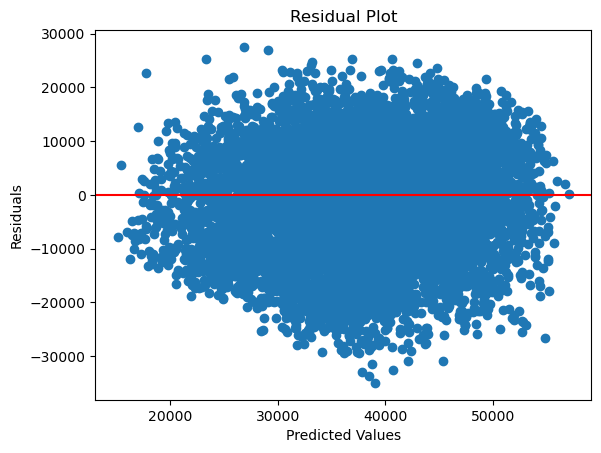

In [30]:
# Define parameter grid
param_grid = {
    'n_estimators': [200,300],
    'max_depth': [None, 10, 50, 100],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False],
    'oob_score': [True, False],
    'max_samples': [None, 0.5, 0.8],
    'ccp_alpha': [0.0, 0.1, 0.5],
    'max_leaf_nodes': [None, 10, 50, 100],
    'min_impurity_decrease': [0.0, 0.1, 0.5],
    'min_weight_fraction_leaf': [0.0, 0.1, 0.5],
    'max_features': ['auto', 'sqrt', 'log2', None],
}

regressor = RandomForestRegressor(random_state=42, n_jobs=-1)

# Define TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)

# Perform grid search
grid_search = RandomizedSearchCV(regressor, param_grid, cv=tscv, scoring='neg_mean_squared_error', n_iter=500, n_jobs=-1)
grid_search.fit(X_TRAIN, Y_TRAIN)

# Fit and predict using best estimator
best_regressor = grid_search.best_estimator_
best_regressor.fit(X_TRAIN, Y_TRAIN)
Y_PRED = best_regressor.predict(X_TEST)

# Print results
print(f"Best Hyperparameters:", grid_search.best_params_)
print(f"Best Score (MSE):", -grid_search.best_score_)
print(f"RMSE:", sqrt(-grid_search.best_score_))
print(f"NRMSE:", sqrt(-grid_search.best_score_) / (max(Y_TEST) - min(Y_TEST)))
print(f"R-squared:", r2_score(Y_TEST, Y_PRED))
print("MAE: ", mean_absolute_error(Y_TEST, Y_PRED))
print("MAPE: ", np.mean(np.abs((Y_TEST - Y_PRED) / Y_TEST)) * 100)

plt.scatter(Y_PRED, Y_TEST - Y_PRED)
plt.axhline(y=0, color='r', linestyle='-')  # Add a horizontal line at y=0
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

In [20]:
# Define parameter grid
param_grid = {
    'n_estimators': range(1,300),
    'max_depth': range(1,100),
    'min_samples_split': range(1,10),
    'min_samples_leaf': range(1,10),
    'max_samples': np.linspace(0.5, 1.0),
    'max_leaf_nodes': [None, 10, 50, 100],
    'max_features': ['auto', 'sqrt', 'log2', None],
}

regressor = RandomForestRegressor(random_state=42, n_jobs=-1)

# Define TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)

# Perform grid search
grid_search = RandomizedSearchCV(regressor, param_grid, cv=tscv, scoring='neg_mean_squared_error', n_iter=500, n_jobs=-1)
grid_search.fit(X_TRAIN, Y_TRAIN)

# Fit and predict using best estimator
best_regressor = grid_search.best_estimator_
best_regressor.fit(X_TRAIN, Y_TRAIN)
Y_PRED = best_regressor.predict(X_TEST)

# Print results
print(f"Best Hyperparameters:", grid_search.best_params_)
print(f"Best Score (MSE):", -grid_search.best_score_)
print(f"RMSE:", sqrt(-grid_search.best_score_))
print(f"NRMSE:", sqrt(-grid_search.best_score_) / (max(Y_TEST) - min(Y_TEST)))
print(f"R-squared:", r2_score(Y_TEST, Y_PRED))
print("MAE: ", mean_absolute_error(Y_TEST, Y_PRED))
print("MAPE: ", np.mean(np.abs((Y_TEST - Y_PRED) / Y_TEST)) * 100)

plt.scatter(Y_PRED, Y_TEST - Y_PRED)
plt.axhline(y=0, color='r', linestyle='-')  # Add a horizontal line at y=0
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

c:\Users\Babett\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
870 fits failed out of a total of 2500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
384 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Babett\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Babett\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "c:\Users\Babett\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\Babett\anaconda3\Lib\site-

Best Hyperparameters: {'n_estimators': 283, 'min_samples_split': 7, 'min_samples_leaf': 2, 'max_samples': 0.7142857142857143, 'max_leaf_nodes': None, 'max_features': 'log2', 'max_depth': 75}
Best Score (MSE): 98751144.72589421
RMSE: 9937.36105441954
NRMSE: 0.14672889369547204
R-squared: 0.4163565581054164
MAE:  7964.750220017011
MAPE:  30.778891229779425


In [10]:
# Define parameter grid
param_grid = {
    'n_estimators': [500],
    'max_depth': range(5, 15),
    'min_samples_split': range(3, 7),
    'min_samples_leaf': [None, 1, 2, 3],
    'max_features': ['auto', 'sqrt', 'log2', None],
    'bootstrap': [True],
    'oob_score': [False],
    'max_samples': np.linspace(0.5, 1.0),
    'ccp_alpha': [0.3, 0.5, 0.7],
    'max_leaf_nodes': np.linspace(75, 125),
    'min_impurity_decrease': [0.3, 0.5, 0.7],
    'min_weight_fraction_leaf': [0.0, 0.05, 0.1],
}

regressor = RandomForestRegressor(random_state=42, n_jobs=-1)

# Perform grid search
grid_search = GridSearchCV(regressor, param_grid, cv=10, scoring='neg_mean_squared_error')
grid_search.fit(X_TRAIN, Y_TRAIN)

# Fit and predict using best estimator
best_regressor = grid_search.best_estimator_
best_regressor.fit(X_TRAIN, Y_TRAIN)
Y_PRED = best_regressor.predict(X_TEST)

# Print results
print(f"Best Hyperparameters:", grid_search.best_params_)
print(f"Best Score (MSE):", -grid_search.best_score_)
print(f"RMSE:", sqrt(-grid_search.best_score_))
print(f"NRMSE:", sqrt(-grid_search.best_score_) / (max(Y_TEST) - min(Y_TEST)))
print(f"R-squared:", r2_score(Y_TEST, Y_PRED))
print("MAE: ", mean_absolute_error(Y_TEST, Y_PRED))
print("MAPE: ", np.mean(np.abs((Y_TEST - Y_PRED) / Y_TEST)) * 100)

# Get the feature names as a list
feature_names = list(X_TRAIN.columns)

# Plot the Decision Tree
plt.figure(figsize=(120,20))
plot_tree(best_regressor, filled=True, feature_names=feature_names, fontsize=12)
plt.title("Random Forest Regression with GridSearchCV & Hyperparameter Tuning")
plt.show()

KeyboardInterrupt: 